Based on Udacity Deep Learning course

# Introduction to Deep Learning

## Basic Logistic Classifier

### Softmax Function

<center>$S_{y_i} = \frac{e^{y_i}}{\sum_{j}^{}e^{y_j}}$</center>

**Softmax** or **Normalized Exponential Function** is used to represent probabilistic distribution of K-dimensional vector that sums up to 1.

[0.8360188  0.11314284 0.05083836]
(3, 80)


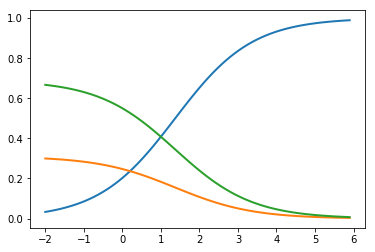

In [2]:
"""Softmax."""

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x) * 0.2, np.ones_like(x)])

print(scores.shape)

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

### One-Hot Encoding

Ones and Zeros only.

Might increase accuracy, but highly increase computing costs (all those zeros) when the number of feature in the category increases

### Cross Entropy

<center>$D(S,L) = - \sum_{i}L_{i}\log(S_{i})$</center>

S = Softmax Distribution

L = One-Hot Encoding Label)

### Training Loss

<center>$loss = \frac{1}{N}\sum_{i}D(S(wx_{i} + b), L_{i})$</center>

Training loss is the average cross-entropy, and is defined by the value of **w** (weights) and **b** (biases). Since we want the least amount of loss, we need to minimize the value by finding the optimal w and b.

### Gradient Descent

Gradient Descent is used to find the optimal values of w and b, but it is not very effective if the dimension of data is very large.

### The 30 Example Rule

If a change affects at least 30 data to be classified correctly, then it could be classified as a meaningful change.

## Deep Neural Network

### Activation Function

Activation function is an important feature in a neural network. It decides when a neuron should be activated (respond or ignore the given information). Activation function is the **non-linear transformation** that is done to the input signal. The transformed output is then sent to the next layer of neurons as input.

<center>$Y = Activation(\Sigma(weight * input) + bias)$</center>

A neural network **without** an activation function is basically a **linear regression** model. A linear model simply could not solve more complex tasks that a non-linear model could.

#### Binary Step

A threshold-based classifier, if the input value is above a given threshold, then the neuron is activated, else it will be deactivated.

<center> $f(x) = 1, x >= 0$ </center>

Unfortunately, it is only applicable for a **binary classifier**. The step function is not really useful for multi-class classifier, since the gradient is 0. During back-propagation, the gradient of the activation function is used in error calculations, so a gradient of 0 is not really useful at all.

#### Linear Function

<center>$f(x) = ax + b$</center>

A basic linear equation that causes the activation to be proportional to the input. For multi-class classifier, we can simply choose the one with the highest value.

<center>$f'(x) = a$</center>

However, the derivative of a linear function is constant; it is independent of the input value $x$. This causes a problem during back-propagation since the gradient is pretty much the same and we did not actually improve our errors.

#### Sigmoid

<center>$f(x) = \frac{1}{1 + e^{-x}}$</center>

A sigmoid is a smooth function that is continuously differentiable. The value ranges between 0 to 1, with high gradient between -3 and 3. This means small change in range (-3,3) will cause large changes in the output value.

The function essentially tries to push Y values toward the extremes, and that is good for a classifier.

#### Tanh

<center>$f(x) = \frac{2}{1 + e^{-2x}}-1$</center>

A tanh is very similar to the sigmoid function but is symmetric over the origin point. The value ranges between 0 to 1, with high gradient between -2 and 2.

The function has steeper gradient compared to the sigmoid function. Choosing between sigmoid and tanh depends on the gradient requirement in the problem statement.

#### Rectified Linear Unit (ReLU)

<center>$f(x) = max(0,x)$</center>

ReLU is one of the most widely used activation function today. It is non-linear, which means back-propagation is viable. Furthermore, ReLU does not activate all neurons at the same time, negative input will convert to zero and the neuron does not get activated. This means only a few neurons are activated, making the network sparse and faster for computation.

Unfortunately, ReLU could create dead neurons which never get activated because the gradient on the negative side of the graph is 0.

#### Leaky ReLU

<center>$ f(x) = ax, x < 0 $</center>

<center>$ f(x) = x, x \geqslant 0 $</center>

An improved version of ReLU, where the horizontal line of 0 for negative values is replaced with a non-horizontal line with a non-zero gradient. This solves the dead neurons problem that a traditional ReLU has.

#### Softmax

<center>$S_{y_i} = \frac{e^{y_i}}{\sum_{j}^{}e^{y_j}}$</center>

Softmax is a type of sigmoid function that is able to handle **more than two classes**. The softmax function creates probabilities for each class based on the input value. It is ideally used in the output layer of the classifier where we need to get the probabilities to define the class of each input.

### Choosing the Right Activation Function

- Sigmoid and Tanh functions are sometimes avoided due to **vanishing gradient problem**
- ReLU and its derivatives are often used in most cases
- Leaky ReLU eliminates dead neurons problem that regular ReLU has
- ReLU should **only be used in hidden layers**

## Feed Forward and Back Propagation

### Feed Forward

<center>$v = \displaystyle\sum_{i}input_{i}*weight_{i}$</center>

<center>$y = \varphi(v)$</center>

With $\varphi$ as the activation function, y is the output of each node, which is also the input for nodes in the next layer.

### Back Propagation

**Local gradient for output unit**

<center>$\delta_{k} = o_{k}(1-o_{k})(t_{k} - o_{k})$</center>

Where $o$ denotes _output value_, and $t$ denotes _target value_.

**Local gradient for hidden unit**

<center>$\delta_{h} = o_{h}(1-o_{h})(\displaystyle\sum_{k \epsilon nextlayer}w_{h,k}\delta_{k})$</center>

### Update Weight with momentum

<center>$w(n+1) = w(n) + \alpha * w(n-1) + \eta * \delta(n) * y$</center>

Where $\alpha$ denotes the momentum and $\eta$ denotes the learning rate.

Don't forget to update weight for **bias**! (Same formula, replace $w$ with $b$)

## Weight Initialization

There are a number of ways for initializing the weights in a neural network:
- Set all weights to 0
- Set all weights by drawing from standard normal distribution with mean=0 and variance=1

Setting all the weights to 0 basically turns the model to a **linear model** because all the weights will be the same values in the iterations.

<center>$ W^{[l]} = np.random.randn(size^{[l]}, size^{[l-1]})$</center>

<center>Python's implementation using numpy, where $size^{[l]}$ represents the number of nodes in layer $l$</center>

Drawing from standard normal distribution is obviously better for a deep network. However, using that particular method would introduce 2 issues:
- **Vanishing Gradients** -- where the gradient will become smaller and smaller at every iteration, preventing the weights from updating their values.
- **Exploding Gradients** -- the opposite of vanishing gradients, where the gradient gets bigger along the layers in an iteration, this may cause the model to oscillate around the minima and fail to converge.

### He

<center> $\sqrt{\frac{2}{size^{[l-1]}}}$ </center>

Commonly used for ReLU, the drawn values from standard normal distribution is multiplied by the expression above. While this does not completely remove the vanishing and exploding gradient issues, it helps to mitigate them.

### Xavier Glorot

<center> $\sqrt{\frac{1}{size^{[l-1]}}}$ </center>

Commonly used for Tanh, similar to He but the numerator is 1 instead of 2.

##  Regularization

### Dropout

Dropout basically forces all neurons in a layer to learn by randomly deactivating some of them in every iteration. This could help prevent overfitting as, hopefully, every neurons in a layer learn the same "concept".

## Optimizers

- $w$ weight
- $L$ loss function
- $\alpha$ learning rate
- $v$ momentum
- $\mu$ momentum rate
- $m$ moment
- $g$ second order moment
- $\gamma$ decay rate

### Stochastic Gradient Descent

Generate an _estimate_ of training loss based on **random** subset of data. This would minimize the cost of each iteration, since only a subset of data is processed. However, if the picked subset is not random enough, SGD might fail because the estimation is not general enough.

<center>$w_{t+1} = w_{t} - \alpha \delta L(w_{t})$</center>

SGD takes much smaller steps in each iteration and does more iteration than usual gradient descent. In the end, though, SGD is much more efficient and scales well with both data and model size.

Tips to improve SGD:
- **Inputs** should have equal (small) variance with mean = 0.
- **Initial Weights** should be **random**, have equal (small variance) and mean = 0.

#### SGD + Momentum

<center>$v_{t+1} = \mu v_{t} - \alpha \delta L(w_{t})$</center>

<center>$w_{t+1} = w_{t} + v_{t+1}$</center>

SGD takes very small steps toward the minimum loss function, and using **momentum** could help it converges faster. Momentum keeps track of previous changes ($\Delta w$)

Just like the momentum in classical physics, momentum helps accelerate the gradient at the right direction. This reduces the amount of oscillation and also helps in escaping local minima.

#### SGD + Learning Rate Decay

The steps taken in SGD should gradually be smaller to be more accurate. To do that, a learning rate decay is needed. There are a lot of decay algorithms out there, such as exponential decay algorithm. Defining the best decay algorithm is a whole new research area, but generally, the learning rate should decrease as the SGD gets closer to the minima.

P.S.: A higher learning rate does not necessarily mean a better end-result (smaller loss)

### AdaGrad

Scales learning rate according to the history of gradients by dividing current gradient in update rule by the sum of previous gradients.

<center> $g_{t+1} = g_{t} + \delta L(w_{t})^2$ </center>

<center>$w_{t+1} = w_{t} - \frac{\alpha \delta L(w_{t})^2}{\sqrt{g_{t+1}} + \epsilon}$</center>

However, using AdaGrad could lead to a problem where the accumulated gradient will become very large and the learning rate becomes very small, causing the model to effectively stop learning.

### RMSProp

Root Mean Square Propagation tries to overcome the accumulated gradient problem in AdaGrad by applying a decay rate $\gamma$. The term $g$ (second order moment) is calculated by exponentially decaying average and not the sum of gradients.


Calculating first order moment,

<center> $m_{t+1} = \gamma m_{t} + (1-\gamma)\delta L(w_{t})$ </center>


Calculating second order moment,

<center> $g_{t+1} = \gamma g_{t} + (1-\gamma)\delta L(w_{t})^2$ </center>


Calculating momentum,

<center> $v_{t+1} = \mu v_{t} - \frac{\alpha \delta L(w_{t})}{\sqrt{g_{t+1} - m_{t+1}^{2} + \epsilon}} $ </center>

Updating weight,

<center> $w_{t+1} = w_{t} + v_{t+1}$ </center>

### Adam

Combines AdaGrad and RMSProp, uses accumulated gradient but both the first order moment $m$ and the second order moment $g$ decay over time.

Calculating first order moment,

<center> $\hat{m}_{t+1} = \frac{\gamma_{1}m_{t} + (1-\gamma_{1})\bigtriangledown L(w_{t})}{1 - \gamma_{1}^{t+1}}$ </center>


Calculating second order moment,

<center> $\hat{g}_{t+1} = \frac{\gamma_{2}g_{t} + (1-\gamma_{2})\bigtriangledown L(w_{t})^{2}}{1 - \gamma_{2}^{t+1}}$ </center>

Updating weight,

<center> $w_{t+1} = w_{t} - \frac{\alpha \hat{m}_{t+1}}{\sqrt{\hat{g}_{t+1}} + \epsilon}$</center>